In [1]:
import torch
from state_quantization.transforms import NormalizeTransform
from envs.IBGym_mod_envs import IBGymModded, IBGymQ
import numpy as np
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
from q_learning.algorithm import QLearning
from envs.env_creator import env_creator
from q_learning.algorithm import QLPolicy
from base_algorithm.eval_policy import EvalDiscreteStatePolicy

/home/hamza/PycharmProjects/StateCompression/q_learning/algorithm.py:102: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if show_reward_type is 'mean':


In [2]:
plt.rcParams["figure.figsize"] = [20,12]

## Init Model and env

In [3]:
device = 'cpu'
policy_path = 'tmp/q_learning/q_policy.pkl'
steps_per_episode = 1000
env_kwargs = {'steps_per_episode': steps_per_episode,'device':device, 'config':None}

In [4]:
algo = QLearning()

In [4]:
alpha = np.logspace(np.log(0.9), np.log(0.05), 1000, base=np.exp(1))
gamma = 0.995
#epsilon = 0.05
total_epochs = 2000
exp_decay = 0.001
epsilon = np.logspace(np.log(1), np.log(0.01), 1000, base=np.exp(1))

## Train policy

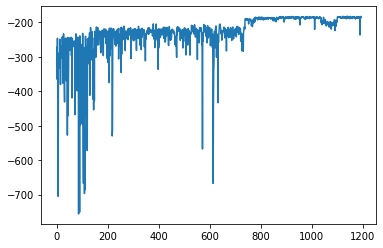

Episode 1194 Reward: -183.5935294937827
Total States: 1405


KeyboardInterrupt: 

In [7]:
import time

start = time.time()
algo.train(epochs=total_epochs,alpha=alpha,gamma=gamma,epsilon=epsilon,env_creator=env_creator, env_kwargs=env_kwargs,reward_offset=2000, graph=True)
end = time.time()
print(end-start)

## Save Policy

In [8]:
algo.policy.q_table

{29866.0: array([360597.79146822, 360696.67119537, 360586.81616034, 360781.37868895,
        360638.77635653, 360709.96811185, 360665.09930022, 360712.41274493,
        360656.62646377, 360635.13063515, 360714.18586636, 362137.91740805,
        360692.16116751, 360710.13408796, 360644.45591761, 360549.34090722,
        360632.81430037, 360538.96422558, 360587.74342276, 360288.82191246,
        360541.4222986 , 360717.31422323, 360657.43441328, 360749.32482724,
        360620.00175238, 360544.78155734, 360597.11660577]),
 30250.0: array([360668.13382515, 360452.30841129, 360578.12089748, 360638.63069423,
        360592.2691922 , 361867.32283823, 360578.24247336, 360578.03556011,
        360568.74072905, 360583.10745885, 360574.38330774, 360664.04848125,
        360639.0171863 , 360569.1327377 , 360577.30777151, 360605.30725413,
        360620.84462445, 360716.62809361, 360609.54837115, 360777.60628143,
        360681.2312819 , 360574.20250649, 360578.10857705, 360573.86522711,
        3

In [9]:
algo.policy.save(policy_path)
del algo

## Load Policy

In [4]:


policy = QLPolicy.load(policy_path)
algo = EvalDiscreteStatePolicy(policy=policy,env_creator=env_creator,env_kwargs=env_kwargs)

## Evaluate policy

Episode 9 Reward: -187.48443308453628 || New State Found: False


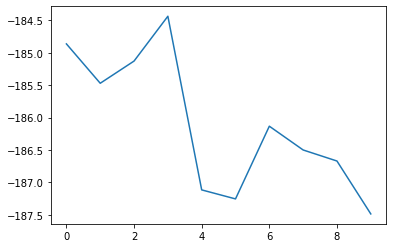

In [5]:
algo.evaluate(epochs=10)

In [7]:
np.mean(algo.eval_rewards_per_epoch)

-185.2411789684964

In [13]:
np.std(algo.eval_rewards_per_epoch)

2.037930304009492